In [169]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

branch_metrics = pd.read_csv('data/clean/branch_metrics.csv')
branch_metrics_nonzero = branch_metrics[(branch_metrics['VISITORS'] > 0) & (branch_metrics['COMPUTER_SESSIONS'] > 0)]
branch_metrics['COMPUTER_SESSIONS_2'] = branch_metrics['COMPUTER_SESSIONS'].fillna(0)
branch_metrics['VISITORS_2'] = branch_metrics['VISITORS'].fillna(0)
#2011 and 2012 have NaN values
branch_metrics.head(5)

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS,COMPUTER_SESSIONS_2,VISITORS_2
0,Albany Park,2011,1,8427.0,1666.0,9604.0,1666.0,9604.0
1,Albany Park,2011,2,7023.0,1296.0,10500.0,1296.0,10500.0
2,Albany Park,2011,3,9702.0,1735.0,9050.0,1735.0,9050.0
3,Albany Park,2011,4,9344.0,1841.0,9300.0,1841.0,9300.0
4,Albany Park,2011,5,8865.0,1683.0,8271.0,1683.0,8271.0


Graphs from Yesterday
- circ over years by branch
- circ over months (averaged years) by branch
- circ over years -- top 5 and bottom 5 branches

- circ/visitosrs on line graph -- averaged out -- done
- circ vs visitors scatterplot -- done

To do
- add computer sessions and visitors to my all time line
- track circulation per visitor for a full year pre downloadable materials and post downloadable materials (eg 2017 vs 2022)

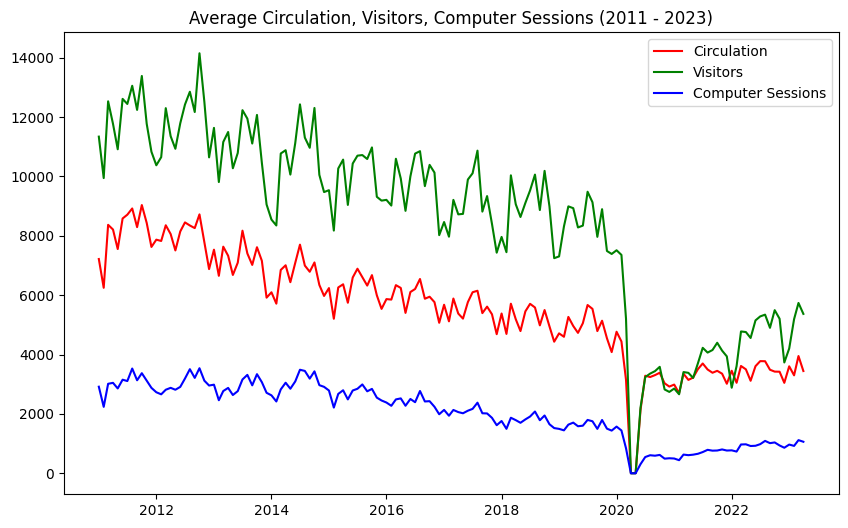

In [163]:
# Convert the 'YEAR' and 'MONTH' columns to a datetime format
branch_metrics['DATE'] = pd.to_datetime(branch_metrics[['YEAR', 'MONTH']].assign(DAY=1))

# Group the data by 'DATE' and calculate the mean number of circulation
monthly_circ = branch_metrics.groupby('DATE')['CIRCULATION'].mean()
monthly_vis = branch_metrics.groupby('DATE')['VISITORS'].mean()
monthly_comp = branch_metrics.groupby('DATE')['COMPUTER_SESSIONS'].mean()

# Plot the monthly visitor patterns
plt.figure(figsize=(10,6)) 
plt.plot(monthly_circ, color = 'red')
plt.plot(monthly_vis, color = 'green')
plt.plot(monthly_comp, color = 'blue')
plt.legend(['Circulation', 'Visitors', 'Computer Sessions'])
plt.title('Average Circulation, Visitors, Computer Sessions (2011 - 2023)')
#plt.ylabel('USD (in 2020 dollars)')
#plt.xlabel('Year')
plt.show()

/tmp/ipykernel_446685/138715848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branch_metrics_nonzero['DATE'] = pd.to_datetime(branch_metrics_nonzero[['YEAR', 'MONTH']].assign(DAY=1))
/tmp/ipykernel_446685/138715848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branch_metrics_nonzero['CIRC PER VISITOR'] = branch_metrics_nonzero['CIRCULATION']/branch_metrics_nonzero['VISITORS']


<Axes: title={'center': 'Average of Circulation Per Visitor of All Branches'}, xlabel='Date', ylabel='Average Circulation per Visitor'>

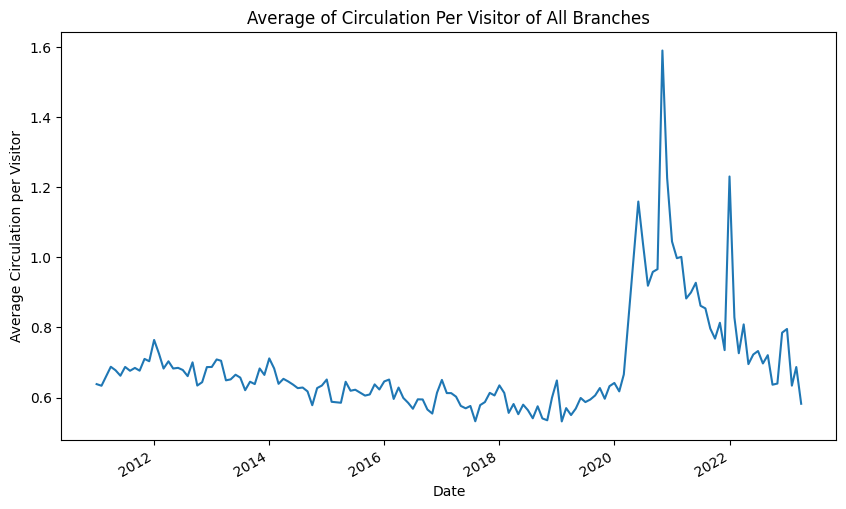

In [164]:
branch_metrics_nonzero['DATE'] = pd.to_datetime(branch_metrics_nonzero[['YEAR', 'MONTH']].assign(DAY=1))
branch_metrics_nonzero['CIRC PER VISITOR'] = branch_metrics_nonzero['CIRCULATION']/branch_metrics_nonzero['VISITORS']
#print(branch_metrics.head(5))
    
# Group the data by 'DATE' and calculate the mean number of circulation
monthly_cpv = branch_metrics_nonzero.groupby('DATE')['CIRC PER VISITOR'].mean()

monthly_cpv.plot(figsize=(10, 6), xlabel='Date', ylabel='Average Circulation per Visitor', title ='Average of Circulation Per Visitor of All Branches')

In [81]:
#print(branch_metrics_nonzero.head(5))

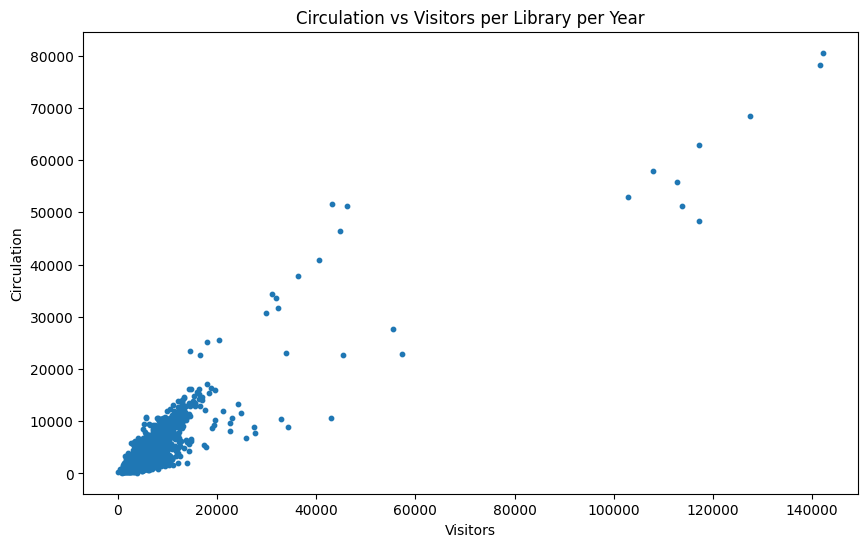

In [80]:
plt.figure(figsize=(10,6)) 
yearly_cpv = branch_metrics_nonzero.groupby(['BRANCH','YEAR']).mean()
#print(yearly_cpv.head(5))
scatter = plt.scatter(x=yearly_cpv['VISITORS'], y=yearly_cpv['CIRCULATION'],s=10)
plt.title('Circulation vs Visitors per Library per Year')
plt.xlabel('Visitors')                                 
plt.ylabel('Circulation')   
plt.show()

/tmp/ipykernel_446685/2249176593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circ_years.drop(columns = 'BRANCH', inplace = True)


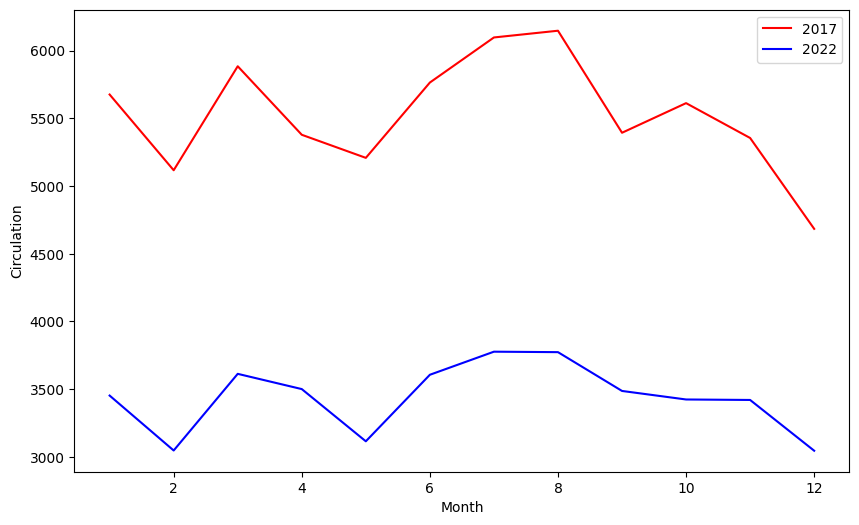

In [160]:
circ_years = branch_metrics.loc[(branch_metrics['YEAR']==2017)|(branch_metrics['YEAR']==2022)]
circ_years.drop(columns = 'BRANCH', inplace = True)

circ_years_2017 = circ_years.loc[(circ_years['YEAR']==2017)]
circ_years_2022 = circ_years.loc[(circ_years['YEAR']==2022)]
circ_years_2017 = circ_years_2017.groupby(['MONTH'])[['CIRCULATION']].mean()
circ_years_2022 = circ_years_2022.groupby(['MONTH'])[['CIRCULATION']].mean()

plt.figure(figsize=(10,6)) 
plt.plot(circ_years_2017, color = 'red')
plt.plot(circ_years_2022, color = 'blue')
plt.legend(['2017', '2022'])
plt.ylabel('Circulation')
plt.xlabel('Month')
plt.show()

/tmp/ipykernel_446685/1037906077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circ_years_2.drop(columns = 'BRANCH', inplace = True)
/tmp/ipykernel_446685/1037906077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circ_years_2['CIRC PER VISITOR'] = circ_years['CIRCULATION']/circ_years['VISITORS']


       CIRC PER VISITOR
MONTH                  
8              0.532189
9              0.578312
10             0.586975
11             0.613304
12             0.605905


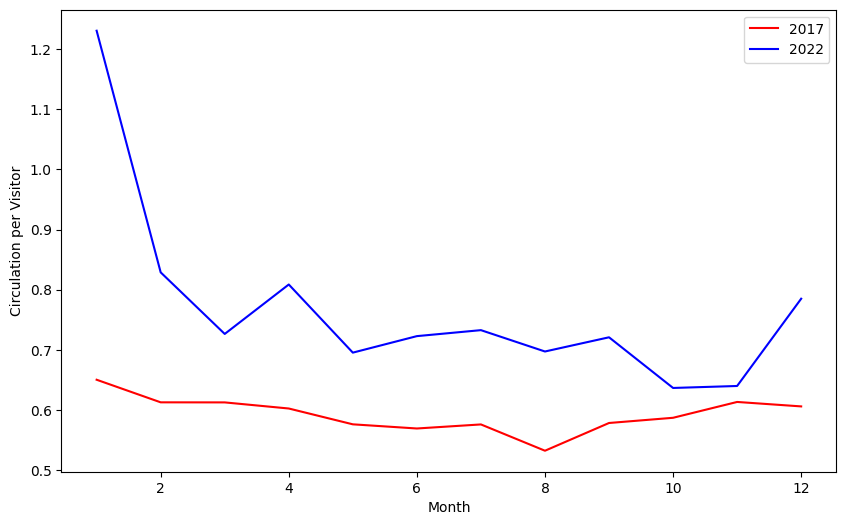

In [173]:
circ_years_2 = branch_metrics_nonzero.loc[(branch_metrics_nonzero['YEAR']==2017)|(branch_metrics_nonzero['YEAR']==2022)]
circ_years_2.drop(columns = 'BRANCH', inplace = True)
circ_years_2['CIRC PER VISITOR'] = circ_years['CIRCULATION']/circ_years['VISITORS']

cpv_2017 = circ_years_2.loc[(circ_years_2['YEAR']==2017)]
cpv_2022 = circ_years_2.loc[(circ_years_2['YEAR']==2022)]
cpv_2017 = cpv_2017.groupby(['MONTH'])[['CIRC PER VISITOR']].mean()
cpv_2022 = cpv_2022.groupby(['MONTH'])[['CIRC PER VISITOR']].mean()
print(cpv_2017.tail(5))

plt.figure(figsize=(10,6)) 
plt.plot(cpv_2017, color = 'red')
plt.plot(cpv_2022, color = 'blue')
plt.legend(['2017', '2022'])
plt.ylabel('Circulation per Visitor')
plt.xlabel('Month')
plt.show()